# Description

Used car price prediction, dataset from kaggle which includes every used vehicle entry within the United States on Craigslist.

# Import

In [1]:
import numpy as np 
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# Reading Data

In [2]:
df=pd.read_csv("vehicles.csv")

In [3]:
df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
59994,7194535865,https://nh.craigslist.org/ctd/d/salem-2014-che...,new hampshire,https://nh.craigslist.org,33944,2014.0,chevrolet,silverado,NaN,NaN,...,4wd,NaN,pickup,black,https://images.craigslist.org/01616_ebn0Aqs3DF...,2014 Chevrolet Chevy Silverado 2500HD 4WD DURA...,NaN,nh,42.7882,-71.2337
322152,7190417104,https://lubbock.craigslist.org/ctd/d/lubbock-2...,lubbock,https://lubbock.craigslist.org,3900,2015.0,mitsubishi,mirage,excellent,3 cylinders,...,fwd,compact,hatchback,silver,https://images.craigslist.org/00c0c_d3SFfrapXy...,"Automatic 4 door hatchback, run excellent, blu...",NaN,tx,33.5548,-101.9420
396374,7187686148,https://westernmass.craigslist.org/cto/d/chico...,western massachusetts,https://westernmass.craigslist.org,13933,2016.0,subaru,forester,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00707_8jchdDoo4q...,Green Exterior Gray Leather Interior 2.5 Liter...,NaN,ma,42.1487,-72.6079
212075,7186531789,https://yubasutter.craigslist.org/ctd/d/yuba-c...,yuba-sutter,https://yubasutter.craigslist.org,8499,2013.0,hyundai,elantra gls,excellent,4 cylinders,...,NaN,NaN,sedan,NaN,https://images.craigslist.org/01515_7BX3LrVYXF...,"2013 Hyundai *Elantra* *GLS*185,092 mi. - Au...",NaN,ca,39.1234,-121.6110
37125,7196314072,https://sandiego.craigslist.org/csd/cto/d/san-...,san diego,https://sandiego.craigslist.org,9600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca,NaN,NaN


In [4]:
# Know we will check a shape of dataset
df.shape

(423857, 25)

In [5]:
# Check info, and we will classify feature is numberic type or category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

# Data Transformation


The data have many features, we need to check the value of each feature and remove some unimportant ones.

In [6]:
feature =df.columns
for value in feature:
    print('Column name: {}'.format(value))
    print(df[value].value_counts())
    print('='*50)

Column name: id
7184791621    1
7194329361    1
7194912790    1
7185506469    1
7185509110    1
             ..
7196664431    1
7196664662    1
7196665504    1
7196665569    1
7195109037    1
Name: id, Length: 423857, dtype: int64
Column name: url
https://duluth.craigslist.org/ctd/d/duluth-2000-gmc-new-sierra-1500-ext-cab/7184791621.html           1
https://boston.craigslist.org/gbs/ctd/d/belmont-jeep-wrangler-4x4-sahara-2dr/7194329361.html          1
https://orangecounty.craigslist.org/ctd/d/buena-park-2016-lexus-es-350-skug-sedan/7194912790.html     1
https://cincinnati.craigslist.org/ctd/d/camp-dennison-2014-audi-a4/7185506469.html                    1
https://cincinnati.craigslist.org/ctd/d/cincinnati-2016-ram-promaster-1500-low/7185509110.html        1
                                                                                                     ..
https://portland.craigslist.org/mlt/ctd/d/portland-2016-ford-escape-4x4-4wd-se-suv/7196664431.html    1
https://portland.craigsl

VISIT OUR WEBSITE WWW.DIRECTDETAILOFOH.COM HTTPS://DIRECTDETAILOHIO.COM/  WE HAVE A SELECTION OF CARS,TRUCKS,SUV'S. GUARANTEED APPROVAL. BUY HERE PAY HERE. NO CREDIT CHECKS! NO INCOME VERIFICATION!  Vehicle is AS-IS NO Warranty. Information deemed reliable, but not guaranteed. Interested parties should confirm all data before relying on it to make a purchase decision. All prices and specifications are subject to change without notice. Prices may not include additional fees such as government fees and taxes, title and registration fees, finance charges, dealer document preparation fees, processing fees, and emission testing and compliance charges.                                                                                                                                                                                                                                                                                                                                                          

We can see many features not important for training data processing so we removed unimportant columns and checked the row count

In [7]:
df.drop(columns=['id','url','region', 'region_url', 'vin', 'image_url', 'description', 'lat', 'long','county',], axis=1, inplace = True)
df.shape

(423857, 15)

In [8]:
df.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
19486,19641,2011.0,gmc,sierra 1500,NaN,8 cylinders,gas,120689.0,clean,automatic,4wd,NaN,truck,white,ks
399192,6995,2010.0,toyota,corolla,excellent,NaN,gas,181705.0,clean,automatic,fwd,NaN,sedan,white,ca
25006,3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca
36290,304,2018.0,nissan,rogue awd sl,NaN,4 cylinders,gas,33995.0,clean,automatic,4wd,NaN,SUV,NaN,or
120100,39999,2019.0,toyota,4runner trd off road 4x4,NaN,NaN,gas,24255.0,clean,automatic,4wd,NaN,SUV,white,wa


In [9]:
df.describe()

,price,year,odometer
count,4.238570e+05,328743.000000,2.705850e+05
mean,5.779437e+04,2009.827358,9.942578e+04
std,1.002581e+07,10.135809,1.204833e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.499000e+03,2007.000000,4.432400e+04
50%,9.995000e+03,2012.000000,9.174900e+04
75%,1.899500e+04,2016.000000,1.372370e+05
max,3.808256e+09,2021.000000,1.000000e+07


Text(0.5, 1.0, 'The prices on data')

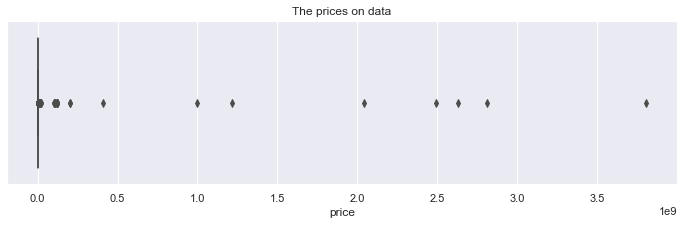

In [10]:
fig, axis = plt.subplots(figsize=(12,3))
sns.boxplot(x='price', data = df)
axis.set_title('The prices on data')

Some extremely large prices in plot. We need to remove them.

In [11]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
data_filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
df = df.loc[data_filter]  
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423852,1600,2006.0,hyundai,sonata,fair,6 cylinders,gas,159980.0,clean,automatic,fwd,NaN,sedan,blue,mn
423853,9000,2003.0,toyota,sequoia limited,excellent,8 cylinders,gas,160000.0,clean,automatic,4wd,full-size,SUV,green,mn
423854,700,1994.0,ford,f-150,fair,6 cylinders,gas,212000.0,clean,manual,rwd,NaN,NaN,green,mn
423855,3800,1999.0,lincoln,town car,excellent,8 cylinders,gas,160000.0,clean,automatic,rwd,NaN,sedan,NaN,mn


<AxesSubplot:title={'center':'Distribution of the prices'}, xlabel='price', ylabel='Count'>

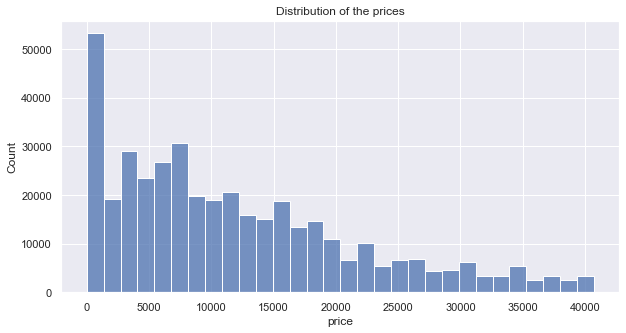

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution of the prices')
sns.histplot(df['price'], bins=30, kde=False)

The data is positively skewed, value at zero too many, this so weird, we neet to remove them too.

<AxesSubplot:xlabel='price', ylabel='Count'>

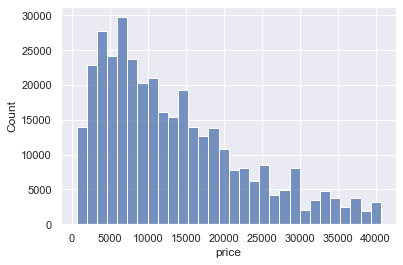

In [13]:
df = df[df['price']>600]
sns.histplot(df['price'], bins=30, kde=False)

In [14]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423852,1600,2006.0,hyundai,sonata,fair,6 cylinders,gas,159980.0,clean,automatic,fwd,NaN,sedan,blue,mn
423853,9000,2003.0,toyota,sequoia limited,excellent,8 cylinders,gas,160000.0,clean,automatic,4wd,full-size,SUV,green,mn
423854,700,1994.0,ford,f-150,fair,6 cylinders,gas,212000.0,clean,manual,rwd,NaN,NaN,green,mn
423855,3800,1999.0,lincoln,town car,excellent,8 cylinders,gas,160000.0,clean,automatic,rwd,NaN,sedan,NaN,mn


Now we will obsevier feature **odometer**

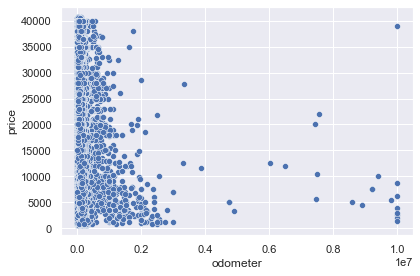

In [15]:
# df['odometer'].sort_values(ascending = True)
ax = sns.scatterplot(x="odometer", y="price", data=df)

plt.tight_layout()


We will set value of  above 2500000 can be considered as outliers

In [16]:
df = df[df['odometer']<2500000]

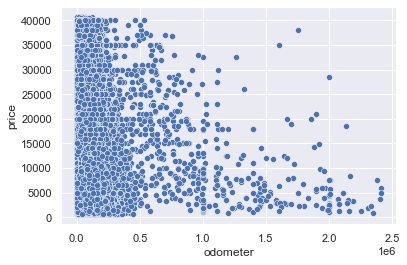

In [17]:
ax = sns.scatterplot(x="odometer", y="price", data=df)

Now we will check cols 'year'

<AxesSubplot:title={'center':'Distribution of the year'}, xlabel='year', ylabel='Count'>

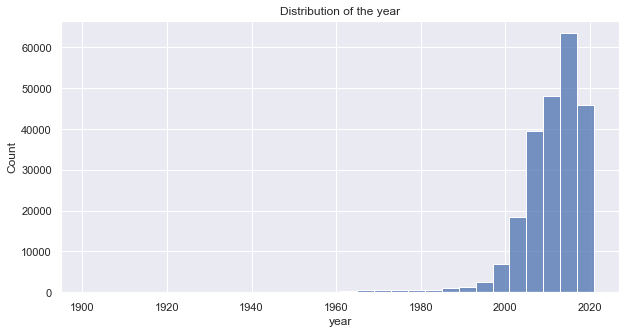

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Distribution of the year')
sns.histplot(df['year'], bins=30, kde=False)

The value is nagative skew, and so many values is rezo (1900-1940). We will remove this values.

In [19]:
df = df[df['year']>=1940]

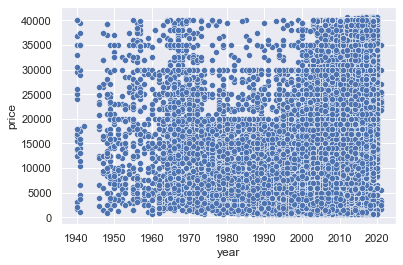

In [20]:
bx = sns.scatterplot(x="year", y="price", data=df)


Check a data and remove duplicated

In [21]:
df['manufacturer'].value_counts()


ford               40434
chevrolet          31777
toyota             19107
honda              14227
nissan             13129
jeep               10229
dodge               8568
gmc                 8417
ram                 7473
hyundai             6572
subaru              6545
bmw                 5928
volkswagen          5478
kia                 5229
mercedes-benz       4901
chrysler            4261
buick               3488
cadillac            3207
mazda               3089
lexus               3016
audi                2416
acura               2151
lincoln             1915
infiniti            1684
volvo               1557
pontiac             1525
mitsubishi          1483
mini                1072
mercury              957
rover                805
saturn               794
jaguar               498
fiat                 426
alfa-romeo           113
harley-davidson       86
tesla                 78
datsun                37
land rover             8
aston-martin           5
porche                 3


Some value have small manufaturer We remove the manufacturers which hold less than 120 records.

In [22]:
rm_values = ['morgan','ferrari','porche','aston-martin','land rover','datsun','tesla','harley-davidson', 'alfa-romeo', ]
for value in rm_values:
    df = df[(df['manufacturer'] != value)]

In [23]:
df['manufacturer'].value_counts()

ford             40434
chevrolet        31777
toyota           19107
honda            14227
nissan           13129
jeep             10229
dodge             8568
gmc               8417
ram               7473
hyundai           6572
subaru            6545
bmw               5928
volkswagen        5478
kia               5229
mercedes-benz     4901
chrysler          4261
buick             3488
cadillac          3207
mazda             3089
lexus             3016
audi              2416
acura             2151
lincoln           1915
infiniti          1684
volvo             1557
pontiac           1525
mitsubishi        1483
mini              1072
mercury            957
rover              805
saturn             794
jaguar             498
fiat               426
Name: manufacturer, dtype: int64

In [24]:
df = df.groupby('model').filter(lambda x: len(x) > 50)


In [25]:
df['model'].value_counts()

f-150             4140
silverado 1500    2671
escape            2455
camry             2087
1500              1943
                  ... 
300-series          51
hummer h2           51
mazda5              51
rendezvous          51
s10                 51
Name: model, Length: 623, dtype: int64

# Data cleaning 


In [26]:
for index,null_value in enumerate(df.isnull().sum()):
    perNull = null_value/len(df.iloc[:,index])*100
    print('Percent null at col {}: {:.1f}%'.format(df.columns[index],perNull))


Percent null at col price: 0.0%
Percent null at col year: 0.0%
Percent null at col manufacturer: 0.6%
Percent null at col model: 0.0%
Percent null at col condition: 44.8%
Percent null at col cylinders: 34.5%
Percent null at col fuel: 0.3%
Percent null at col odometer: 0.0%
Percent null at col title_status: 0.5%
Percent null at col transmission: 0.5%
Percent null at col drive: 23.1%
Percent null at col size: 66.0%
Percent null at col type: 19.1%
Percent null at col paint_color: 24.2%
Percent null at col state: 0.0%


There are a lot of null values in our data set, and the fact that these missing values are difficult to fill in with normal ways.
For columns that have too much missing values, we remove the whole column more than 55% . (for instance "size")


In [27]:
null_val = df.isna().sum()
def na_filter(na, threshold = .55): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
vehicles_cleaned = df[na_filter(null_val)]
vehicles_cleaned.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

Checking feature condition and clean data base on mean odometer

In [28]:
df.condition.value_counts()

excellent    43014
good         31020
like new      7320
fair          2734
new            256
salvage        164
Name: condition, dtype: int64

In [29]:
ex_mean = df['odometer'].loc[df['condition'] == 'excellent'].mean()
good_mean = df['odometer'].loc[df['condition'] == 'good'].mean()
likenew_mean = df['odometer'].loc[df['condition'] == 'like new'].mean()
salvage_mean = df['odometer'].loc[df['condition'] == 'salvage'].mean()
fair_mean = df['odometer'].loc[df['condition'] == 'fair'].mean()
new_mean = df['odometer'].loc[df['condition'] == 'new'].mean()


print('excellent mean odometer {:.2f}'.format(ex_mean))
print('good mean odometer {:.2f}'.format(good_mean))
print('like new mean odometer {:.2f}'.format(likenew_mean))
print('salvage mean odometer {:.2f}'.format(salvage_mean))
print('fair mean odometer {:.2f}'.format(fair_mean))
print('new mean odometer {:.2f}'.format(new_mean))

excellent mean odometer 109443.92
good mean odometer 122113.19
like new mean odometer 81589.20
salvage mean odometer 149432.01
fair mean odometer 181484.40
new mean odometer 62516.07


We will now convention that new cars are cars in 2020 onwards, car 

In [30]:
df.loc[df['year']>=2020, 'condition'] = df.loc[df['year'] >= 2020, 'condition'].fillna('new')

In [31]:
for i in df.drop(['model','manufacturer','paint_color'],axis=1).columns:
    if df[i].dtype=='float':
        df[i]=df[i].fillna(df[i].mean())
    if df[i].dtype=='object':
        df[i]=df[i].fillna(df[i].mode()[0])
df['year']=df['year'].fillna(df['year'].mode()[0])
df['model']=df['model'].fillna('Unknown')
df['manufacturer']=df['manufacturer'].fillna('Unknown')
df['paint_color']=df['paint_color'].fillna('Unknown')

In [32]:
for col in df.columns.values:
    if 'Unknown' in df[col]:
        df = df[(df[col] != 'Unknown')]

# Data visualization

In [33]:
from scipy import stats

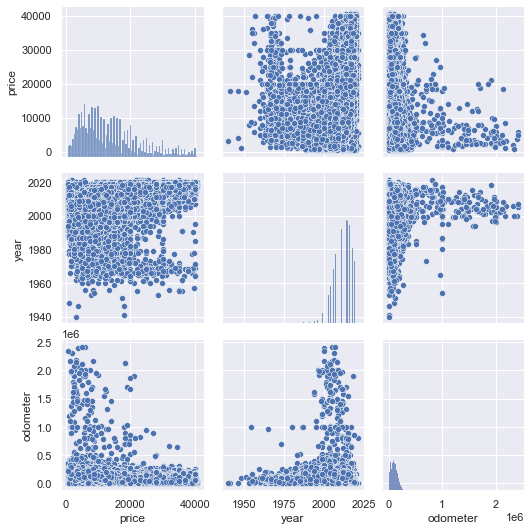

In [34]:
sns.pairplot(df, palette='Accent')


The above were relation between numerical values of the table.

see a graph , we can see the closer to recent years, the more diverse the price of cars. Ortherwise low odometer has a pretty obvious price difference with high odometer. Specifically, the higher the odometer, the lower the price and vice versa.

<AxesSubplot:xlabel='condition', ylabel='price'>

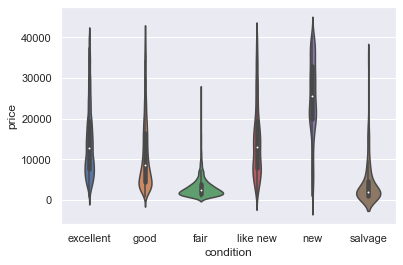

In [35]:
# ax = sns.barplot(x="condition", y="price", data=df)
sns.violinplot(x="condition", y="price", data=df)

we can see based on the price range we can predict which segment is the most expensive and the cheapest. Here, the most expensive cars are in the new feature and the cheapest is in the  salvage features.

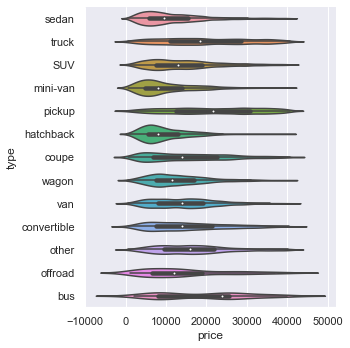

In [36]:
sns.catplot(y="type", x="price",kind="violin", data=df)


This violinplot provides clear idea about the distribution of number of type and the price. 

<AxesSubplot:title={'center':'Box plot of the prices on each color'}, xlabel='paint_color', ylabel='price'>

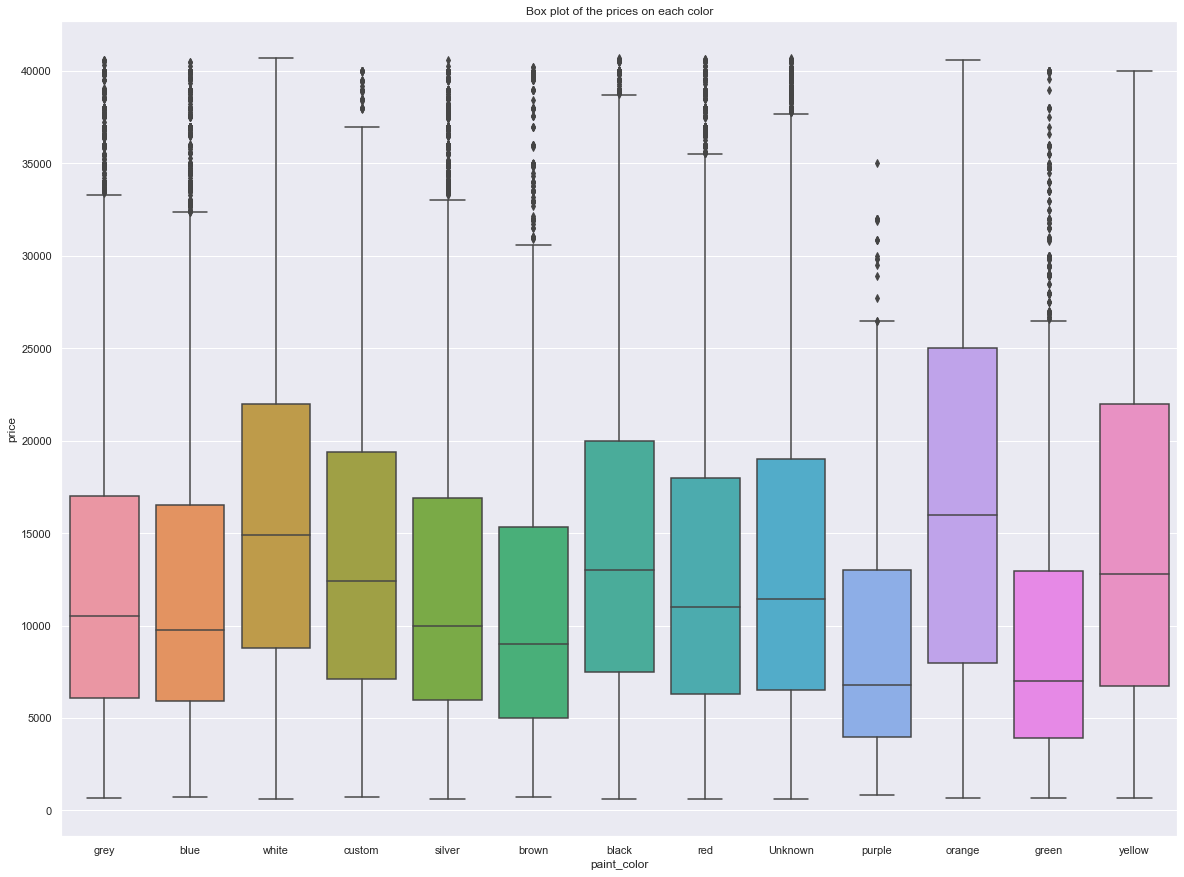

In [37]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Box plot of the prices on each color')
sns.boxplot(x='paint_color', y='price', data = df)

There are 11 different common colors in the dataset. It seems that white, black, orange and yellow cars are the top 4 colors ranked by their median prices. By contrast, green and purple are the least welcome colors.  Note the statement above may not totally correct because  of due to relatively fewer samples for purple, yellow and orange.

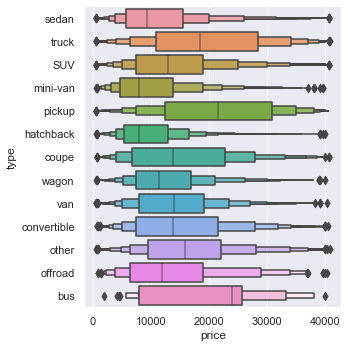

In [38]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

Important observation can be obtained from the above figure regarding the price bracket for each type of vehicle. For example, the bus is popular at the price of 7k - 20k

<AxesSubplot:title={'center':'Person correlations among prices, years and mileages'}>

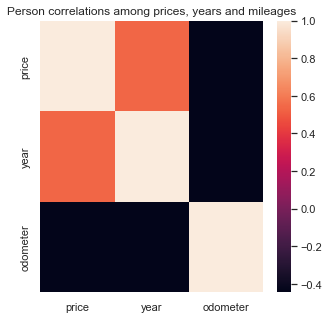

In [39]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Person correlations among prices, years and mileages')
sns.heatmap(df.corr())

This is another way to see the high correlations among years mileages and prices

#  Label Processing


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153226 entries, 1 to 423856
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         153226 non-null  int64  
 1   year          153226 non-null  float64
 2   manufacturer  153226 non-null  object 
 3   model         153226 non-null  object 
 4   condition     153226 non-null  object 
 5   cylinders     153226 non-null  object 
 6   fuel          153226 non-null  object 
 7   odometer      153226 non-null  float64
 8   title_status  153226 non-null  object 
 9   transmission  153226 non-null  object 
 10  drive         153226 non-null  object 
 11  size          153226 non-null  object 
 12  type          153226 non-null  object 
 13  paint_color   153226 non-null  object 
 14  state         153226 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 22.7+ MB


In [42]:
cate_Columns = ['model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color','manufacturer', 'title_status','state']
for column in cate_Columns:
    column = pd.get_dummies(df[column],drop_first=True)
    df = pd.concat([df,column],axis=1)
df = df.drop(columns = cate_Columns)


In [43]:
df=df.drop(columns='size')

In [44]:
std_scaler = StandardScaler()

for column in ['year', 'odometer']:
    df[column] = std_scaler.fit_transform(df[column].values.reshape(-1,1))

# Split Train and Test data


In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price',axis=1), 
                                                    df['price'], test_size=0.30, 
                                                    random_state=141)
model_score = pd.DataFrame(columns=('r2', 'rmse'))


# Training Model

In [46]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

# Random Forest

For the Random Forest, the root mean square error for the testing set is: 3349.3292961192496
The r2 score for the testing set is: 0.8666969741089787


,r2,rmse
Decision Tree,0.866697,3349.329296


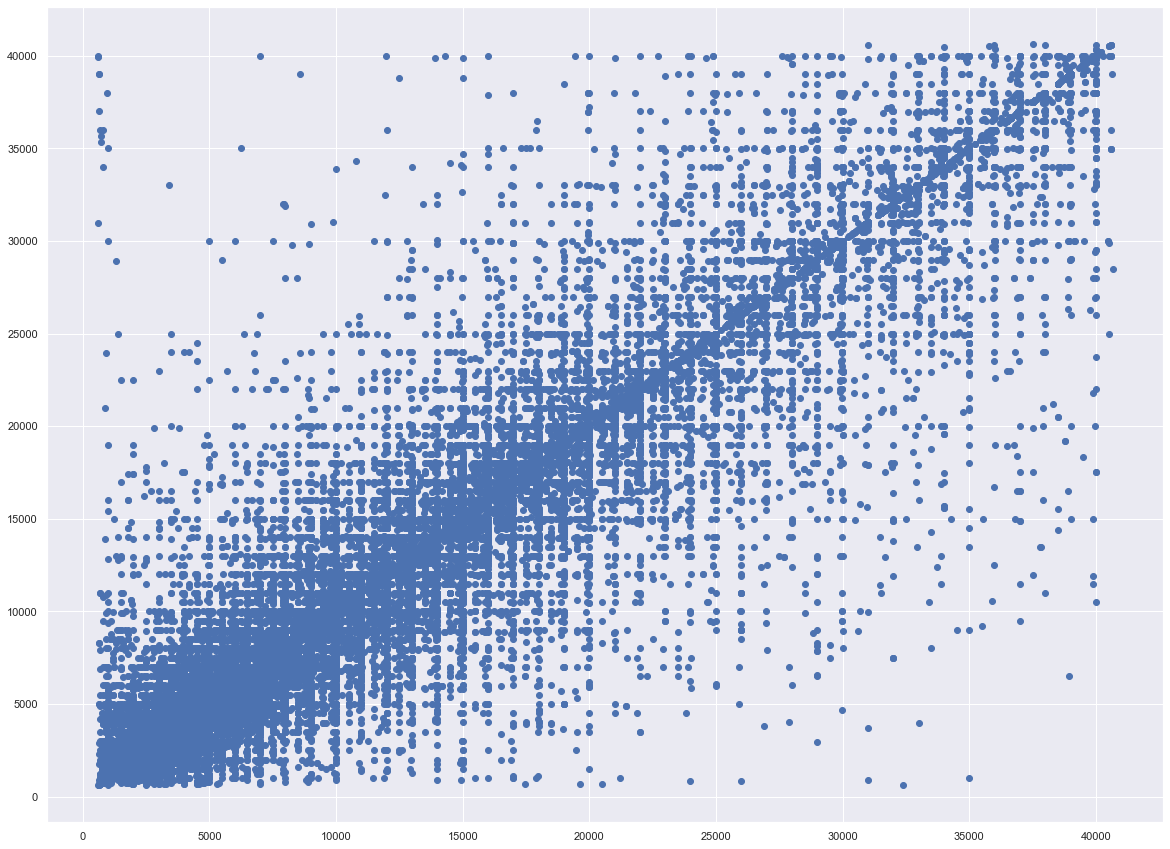

In [47]:
dt_predict = dt_model.predict(X_test)

dt_r2 = metrics.r2_score(y_test, dt_predict)
dt_rmse = math.sqrt(metrics.mean_squared_error(y_test, dt_predict))

model_score = pd.DataFrame({'r2':[dt_r2], 'rmse':[dt_rmse]}, index = ['Decision Tree'])

print('For the Random Forest, the root mean square error for the testing set is:', dt_rmse)
print('The r2 score for the testing set is:', dt_r2)
fig, ax = plt.subplots(figsize=(20,15))
plt.scatter(y_test, dt_predict)
model_score